# Energy price Non-linear regression
Solve for oil sales price (outcome) using 3 predictors of:  
1) WTI Oil Price,   
2) Henry Hub Price, and   
3) MB Propane Spot Price

In [1]:
! pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 53.4 MB/s eta 0:00:00


In [2]:
import numpy as np
from gekko import GEKKO
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# data file from URL address
data = 'https://apmonitor.com/me575/uploads/Main/oil_data.txt'
df = pd.read_csv(data)
df.head()

,YEAR,MONTH,WTI_PRICE,HH_PRICE,NGL_PRICE,BEST_PRICE
0,2000,1,27.24,2.40,0.555,26.6020
1,2000,2,29.21,2.66,0.596,28.8013
2,2000,3,29.92,2.78,0.512,29.0381
3,2000,4,25.78,3.04,0.469,25.0476
4,2000,5,28.78,3.59,0.512,28.3888


In [4]:
xm1 = np.array(df["WTI_PRICE"]) # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])  # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"]) # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"]) # oil sales price

# Fitting Equation


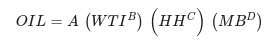




# Minimization Equation (Sum of Squared Errors)


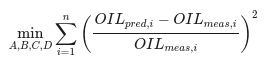

In [6]:
# GEKKO model
m = GEKKO()

a = m.FV(lb=-100.0,ub=100.0)
b = m.FV(lb=-100.0,ub=100.0)
c = m.FV(lb=-100.0,ub=100.0)
d = m.FV(lb=-100.0,ub=100.0)

x1 = m.Param(value=xm1) # WTI Oil Price
x2 = m.Param(value=xm2) # Henry Hub Gas Price
x3 = m.Param(value=xm3) # MB Propane Spot Price

z = m.Param(value=ym)   # oil sales price

y = m.Var() # Output of Fitting Equation
m.Equation(y==a*(x1**b)*(x2**c)*(x3**d)) # Fitting Equation


m.Minimize(((y-z)/z)**2)

In [7]:
# Set Global Options

a.STATUS = 1
b.STATUS = 1
c.STATUS = 1
d.STATUS = 1
m.options.IMODE = 2
m.options.SOLVER = 1

In [8]:
# Solve
m.solve()

print('a: ', a.value[0])
print('b: ', b.value[0])
print('c: ', c.value[0])
print('d: ', d.value[0])

apm 34.69.81.198_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            9
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:            157
 Number of total equations: -          153
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              4
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.52716E+02  0.00000E+00
    1  9.28039E+01  0.00000E+00
    2  4.64819E+01  0.00000E+00
  

In [9]:
cFormula = "Formula is : " + "\n" + r"$A * WTI^B * HH^C * PROPANE^D$"

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

R^2 correlation = 0.9964347959053697


<Figure size 432x288 with 0 Axes>

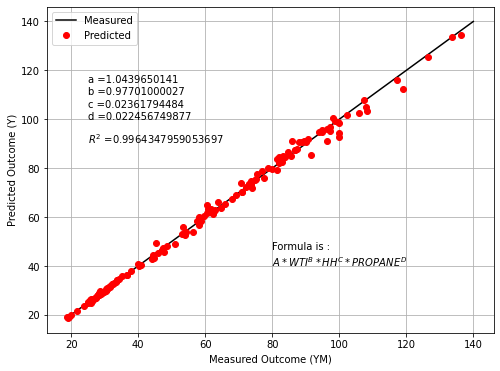

In [13]:
# plot solution
plt.figure(1)
plt.figure(figsize = (8, 6))
plt.plot([20,140],[20,140],'k-',label='Measured')
plt.plot(ym,y,'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='best')
plt.text(25,115,'a =' + str(a.value[0]))
plt.text(25,110,'b =' + str(b.value[0]))
plt.text(25,105,'c =' + str(c.value[0]))
plt.text(25,100,'d =' + str(d.value[0]))
plt.text(25,90,r'$R^2$ =' + str(r_value**2))
plt.text(80,40,cFormula)
plt.grid(True)
plt.show()

In [15]:
m.options.IMODE = 3

# Solve
m.solve()

print('a: ', a.value[0])
print('b: ', b.value[0])
print('c: ', c.value[0])
print('d: ', d.value[0])

apm 34.69.81.198_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            9
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              5
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              4
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.03771E+00  3.99286E-01
    1  7.40116E-03  2.83521E-01
    2  2.63903E-02  1.28195E-01
   